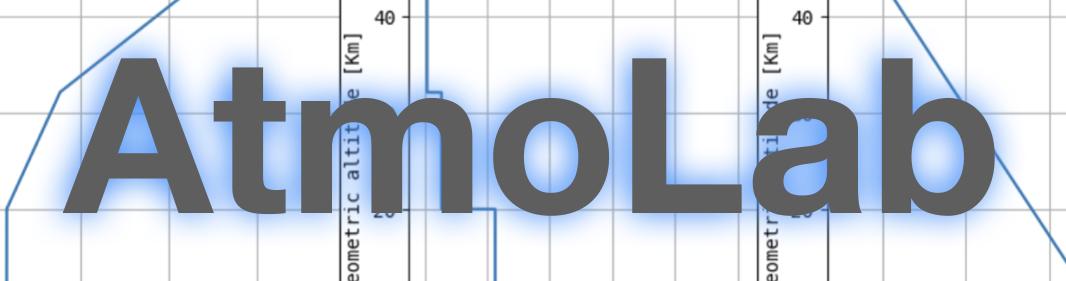

In [277]:
from IPython.display import Image
Image(filename='atmolab/atmolab.png') 


## Science code

In [509]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym
import math
import numpy as np
import scipy
from datetime import datetime
from IPython.display import display, Markdown
import sys
import csv
import dataframe_image as dfi
import matplotlib.style
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
mpl.style.use('classic')



In [510]:
def KtoC(kelvin):
    print("Temperature in Celsius: ", kelvin - 273.15, " ˚C")
    return kelvin - 273.15
def KtoC_silent(kelvin):
 
    return kelvin - 273.15

def gravity_corr(altitude):
    Re=6371.044737 
    g_std=9.80665
    g_corr=g_std*(Re/(Re+altitude))**2
    return g_corr

def calc(input_alt):
    Re=6373.044737 
    print("Earth radius [Km]: ", Re)
    geop=(Re*input_alt)/(Re+input_alt)
    print("Geopotential altitude [Km]: ", geop,"\nInput geometric altitude [Km]: ", input_alt,"\nDifference [Km]: ", input_alt-geop )
    
    base_geop_arr = np.array([0, 11, 20, 32, 47])
    base_pstat_arr = np.array([101325, 22632.06, 5474.889, 868.0187, 110,9063])
    base_temp_arr = np.array([288.15, 216.65, 216.65, 228.65, 270.65])
    base_tlapserate_arr = np.array([-6.5, 0, 1.0, 2.8, 0])
    
    if geop<11:
        indic=0
        layer="Troposphere"
    elif geop>11 and geop<= 20:
        indic=1
        layer="Tropopause - Stratosphere I"
    elif geop>20 and geop<= 32:
        indic=2
        layer="Stratosphere II"
    elif geop>32 and geop<= 47:
        indic=3
        layer="Stratosphere III"
    elif geop>47 and geop<= 51:
        indic=4
        layer="Stratopause - Mesosphere I"
    elif geop>51:
        print("altitude off range")
        indic="false"
        
    else:
        
        print("altitude error")
        indic="false"
        
    

    if indic!="false":
        
        print("Layer number: ", indic, " | Layer: ", layer)
        base_geop=base_geop_arr[indic]
        print("**********")
        print("Base Geopotential Altitude above mean sea level [km]")
        print(f'{base_geop=}')
        print("**********")
        base_pstat=base_pstat_arr[indic]
        print("Base static pressure [Pa]")
        print(f'{base_pstat=}')
        print("**********")
        base_temp=base_temp_arr[indic]
        print("Base temperature [K]")
        print(f'{base_temp=}')
        print("**********")
        base_tlapserate=base_tlapserate_arr[indic]
        print("Base Temperature Lapse Rate per Kilometer of Geopotential Altitude [K/km]")
        print(f'{base_tlapserate=}')
        diff=geop-base_geop


        tempalt_K=(base_temp+base_tlapserate*(diff))

        print("**********")
        tempalt_C=KtoC(tempalt_K)
        print("Temperature in Kelvin: ", tempalt_K , " K")
        print("This is a molecular temperature. Below 100 Km, molecular mass of air remains constant \ntherefore the molecular temperature is equal to the kinetic temperature.")
        print("**********")
        gcorr=gravity_corr(input_alt)
        print("Corrected gravity acc. and difference from standard[m/s**2]: ", gcorr, 9.80665-gcorr)
        R=8.31432*(10**3)
        press_exp=(9.80665*0.0289644)/(R*(base_tlapserate/1000))
        
        pressure_at_alt=base_pstat*(base_temp/tempalt_K)**press_exp
        print("Pressure at altitude [Pa]")
        print(f'{pressure_at_alt=}')
        print("**********")
        rho_at_alt=pressure_at_alt/(287.052*tempalt_K)
        print("Air density at altitude [Kg/m3]")
        print(f'{rho_at_alt=}')
        
        exitarr=([tempalt_C,tempalt_K,gcorr,pressure_at_alt,rho_at_alt])
        return(exitarr)
    
def calc_silent(input_alt):
    
    Re=6373.044737 
    
    geop=(Re*input_alt)/(Re+input_alt)
    
    
    base_geop_arr = np.array([0, 11, 20, 32, 47])
    base_pstat_arr = np.array([101325, 22632.06, 5474.889, 868.0187, 110,9063])
    base_temp_arr = np.array([288.15, 216.65, 216.65, 228.65, 270.65])
    base_tlapserate_arr = np.array([-6.5, 0, 1.0, 2.8, 0])
    
    if geop<11:
        indic=0
        layer="Troposphere"
    elif geop>11 and geop<= 20:
        indic=1
        layer="Tropopause - Stratosphere I"
    elif geop>20 and geop<= 32:
        indic=2
        layer="Stratosphere II"
    elif geop>32 and geop<= 47:
        indic=3
        layer="Stratosphere III"
    elif geop>47 and geop<= 51:
        indic=4
        layer="Stratopause - Mesosphere I"
    elif geop>51:

        indic="false"
    else:
        indic="false"
        
    

    if indic!="false":
        
        base_geop=base_geop_arr[indic]
       
        base_pstat=base_pstat_arr[indic]
        
        base_temp=base_temp_arr[indic]

        base_tlapserate=base_tlapserate_arr[indic]
       
        diff=geop-base_geop


        tempalt_K=(base_temp+base_tlapserate*(diff))


        tempalt_C=KtoC_silent(tempalt_K)

        gcorr=gravity_corr(input_alt)
       
        R=8.31432*(10**3)
        
        #if base_tlapserate == 0:
            
           # pressure_at_alt=base_pstat*math.exp((-9.80665*0.028964*(geop-base_geop))/(R*base_temp))
            
      #  else:
          #  press_exp=(9.80665*0.0289644)/(R*(base_tlapserate/1000))
        
          #  pressure_at_alt=base_pstat*((base_temp/tempalt_K)**press_exp)
        
        if geop < 11 or geop == 11:
            NASA_temp= 15.04 - .00649 * (geop*1000)
            pressure_at_alt = 101.29 * ((tempalt_C + 273.1) / 288.08)**(5.256)*1000
            pressure_at_alt_NASA = 101.29 * ((NASA_temp + 273.1) / 288.08)**(5.256)*1000
        
        if geop > 11 and geop < 25:
            NASA_temp = -56.46
            pressure_at_alt = 22.65 * math.exp(1.73 - 0.000157 * (geop*1000))*1000
            pressure_at_alt_NASA=pressure_at_alt
        if geop == 25:
            pressure_at_alt = 22.65 * math.exp(1.73 - 0.000157 * (geop*1000))*1000
            NASA_temp = -56.46
            pressure_at_alt_NASA=pressure_at_alt
        if geop > 25 :
            NASA_temp = -131.21 + .00299 * (geop*1000)
            pressure_at_alt =   2.488 * ((tempalt_C + 273.1) / 216.6)**(-11.388)*1000
            pressure_at_alt_NASA = 2.488 * ((NASA_temp + 273.1) / 216.6)**(-11.388)*1000
            
        rho_at_alt=pressure_at_alt/(287.052*tempalt_K)
        rho_at_alt_NASA=pressure_at_alt_NASA/(287.052* (NASA_temp+ 273.15))
        exitarr=([tempalt_C,tempalt_K,gcorr,pressure_at_alt,rho_at_alt,NASA_temp,pressure_at_alt_NASA,rho_at_alt_NASA])
        
        return(exitarr)
    
def tempalt_C_selector(inarray):
    return inarray[0]
def tempalt_K_selector(inarray):
    return inarray[1]
def gcorr_selector(inarray):
    return inarray[2]
def pressure_at_alt_selector(inarray):
    return inarray[3]
def rho_at_alt_selector(inarray):
    return inarray[4]
def NASA_temp_selector(inarray):
    return inarray[5]
def pressure_at_alt_NASA_selector(inarray):
    return inarray[6]
def rho_at_alt_NASA_selector(inarray):
    return inarray[7]

In [511]:
array1=calc_silent(25)

tempcvar=tempalt_C_selector(array1)
tempkvar=tempalt_K_selector(array1)
gcorrvar=gcorr_selector(array1)
pressurevar=pressure_at_alt_selector(array1)
rhovar=rho_at_alt_selector(array1)
NASAtempvar=NASA_temp_selector(array1)
pressureNASAvar=pressure_at_alt_NASA_selector(array1)
rhoNASAvar=rho_at_alt_NASA_selector(array1)


## Lapse environment simulation input field

In [512]:
minimum_altitude_km=20
maximum_altitude_km=50
number_of_points=100

## Plotting code

In [513]:
altitudearray=np.linspace(minimum_altitude_km,maximum_altitude_km,number_of_points)
altitudearray_list=altitudearray.tolist()
temperatureClist=[]
temperatureKlist=[]
gcorrlist=[]
pressurelist=[]
rholist=[]
NASAtemplist=[]
pressurelistNASA=[]
rholistNASA=[]
for a in range(len(altitudearray)):
    array1=calc_silent(altitudearray_list[a])
    tempcvar=tempalt_C_selector(array1)
    tempkvar=tempalt_K_selector(array1)
    gcorrvar=gcorr_selector(array1)
    pressurevar=pressure_at_alt_selector(array1)
    rhovar=rho_at_alt_selector(array1)
    NASAtempvar=NASA_temp_selector(array1)
    pressureNASAvar=pressure_at_alt_NASA_selector(array1)
    rhoNASAvar=rho_at_alt_NASA_selector(array1)
    
    temperatureClist.append(tempcvar)
    temperatureKlist.append(tempkvar)
    gcorrlist.append(gcorrvar)
    pressurelist.append(pressurevar)
    rholist.append(rhovar)
    NASAtemplist.append(NASAtempvar)
    pressurelistNASA.append(pressureNASAvar)
    rholistNASA.append(rhoNASAvar)

# Lapse Environment Simulation

date and time = 14/12/2022 17:17:47


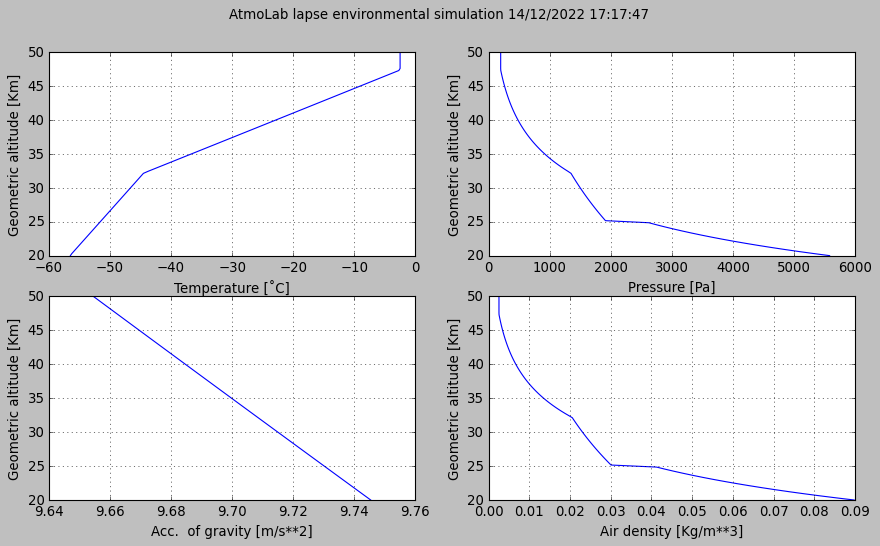

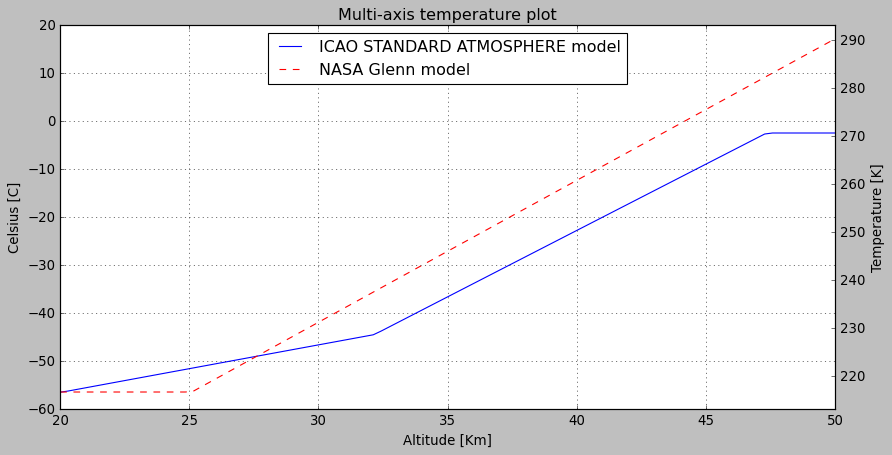

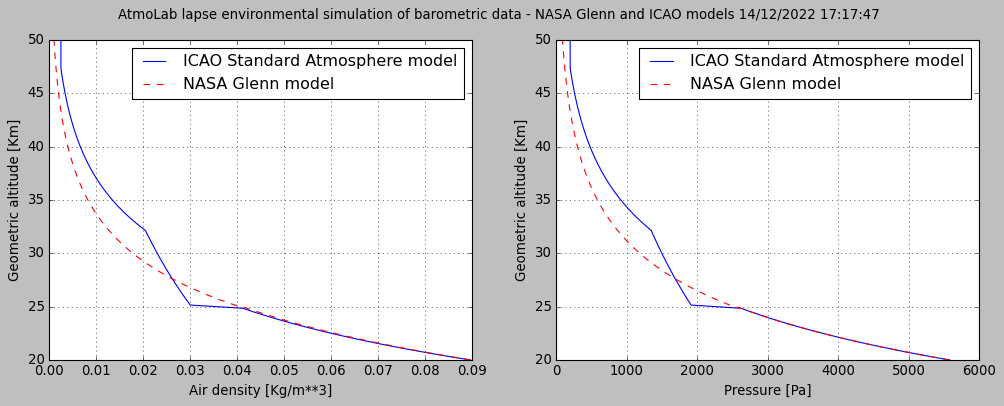

In [514]:
display(Markdown('# Lapse Environment Simulation'))
# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

fig, ( ((ax2, ax3), (ax4, ax5))) = plt.subplots(2, 2)

fig.set_figheight(7)
fig.set_figwidth(13)
titleofsubp="AtmoLab lapse environmental simulation " + dt_string
fig.suptitle(titleofsubp)


ax2.plot(temperatureClist, altitudearray_list,label='ICAO STANDARD ATMOSPHERE model')

ax2.set_ylabel('Geometric altitude [Km]')
ax2.set_xlabel('Temperature [˚C]')
ax2.grid()


ax3.plot(pressurelist, altitudearray_list)
ax3.set_ylabel('Geometric altitude [Km]')
ax3.set_xlabel('Pressure [Pa]')
ax3.grid()

ax4.plot(gcorrlist, altitudearray_list)
ax4.set_ylabel('Geometric altitude [Km]')
ax4.set_xlabel('Acc.  of gravity [m/s**2]')
ax4.grid()

ax5.plot(rholist, altitudearray_list)
ax5.set_ylabel('Geometric altitude [Km]')
ax5.set_xlabel('Air density [Kg/m**3]')
ax5.grid()

def celsius2kelvin(temp):
    """
    Returns temperature in Celsius given Fahrenheit temperature.
    """
    return temp + 273.15


def make_plot():

    # Define a closure function to register as a callback
    def convert_ax_c_to_celsius(ax_f):
        """
        Update second axis according with first axis.
        """
        y1, y2 = ax_f.get_ylim()
        ax_c.set_ylim(celsius2kelvin(y1), celsius2kelvin(y2))
        ax_c.figure.canvas.draw()

    fig, ax_f = plt.subplots()
    ax_c = ax_f.twinx()
    fig.set_figwidth(12.5)
    # automatically update ylim of ax2 when ylim of ax1 changes.
    ax_f.callbacks.connect("ylim_changed", convert_ax_c_to_celsius)

    ax_f.plot(altitudearray_list,temperatureClist, label='ICAO STANDARD ATMOSPHERE model')
    ax_f.plot(altitudearray_list,NASAtemplist, 'r--', label='NASA Glenn model')
    ax_f.legend(loc='upper center')
    ax_f.set_title('Multi-axis temperature plot')
    ax_f.grid()
    ax_f.set_ylabel('Celsius [C]')
    ax_c.set_ylabel('Temperature [K]')
    ax_f.set_xlabel('Altitude [Km]')

    plt.show()

make_plot()



fig2, (axa, axb) = plt.subplots(1, 2)

fig2.set_figheight(5)
fig2.set_figwidth(15)
titleofsubp="AtmoLab lapse environmental simulation of barometric data - NASA Glenn and ICAO models " + dt_string
fig2.suptitle(titleofsubp)


axa.plot(rholist, altitudearray_list,label='ICAO Standard Atmosphere model')
axa.plot(rholistNASA, altitudearray_list,'r--',label='NASA Glenn model')
axa.set_ylabel('Geometric altitude [Km]')
axa.set_xlabel('Air density [Kg/m**3]')
axa.grid()
axa.legend()

axb.plot(pressurelist, altitudearray_list,label='ICAO Standard Atmosphere model')
axb.plot(pressurelistNASA, altitudearray_list,'r--',label='NASA Glenn model')
axb.set_ylabel('Geometric altitude [Km]')
axb.set_xlabel('Pressure [Pa]')
axb.grid()
axb.legend()

## Instant environment simulation input field

In [515]:
altitudeinput=10

## Instant environment simulation code

# Instant Environment Simulation

Input altitude:  10  Km



,Variable,Data
0,Altitude [m],10000.00000
1,ICAO Temperature [˚C],-49.89817
2,ICAO Temperature [K],223.25183
3,ICAO Acceleration of gravity [m/s**2],9.77594
4,ICAO Pressure [Pa],26492.38612
5,ICAO Air density [Kg/m**3],0.41340
6,NASA Glenn Temperature [˚C],-49.75832
7,NASA Glenn Pressure [Pa],26579.74348
8,NASA Glenn Air density [Kg/m**3],0.41450


date and time = 14/12/2022 17:18:07


array([['Altitude [m]', 10000.0],
       ['ICAO Temperature [˚C]', -49.89817],
       ['ICAO Temperature [K]', 223.25183],
       ['ICAO Acceleration of gravity [m/s**2]', 9.77594],
       ['ICAO Pressure [Pa]', 26492.38612],
       ['ICAO Air density [Kg/m**3]', 0.4134],
       ['NASA Glenn Temperature [˚C]', -49.75832],
       ['NASA Glenn Pressure [Pa]', 26579.74348],
       ['NASA Glenn Air density [Kg/m**3]', 0.4145]], dtype=object)

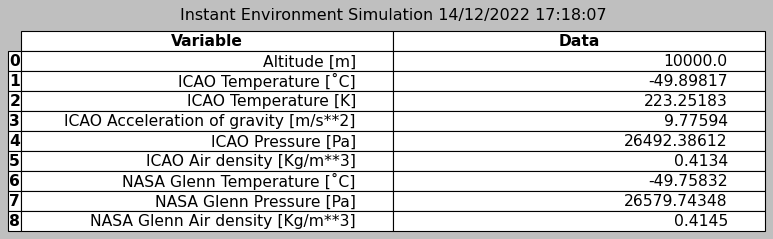

In [519]:
display(Markdown('# Instant Environment Simulation'))

outputarr=calc_silent(altitudeinput)
outputarr=np.insert(outputarr, 0, altitudeinput*1000)
outputarr=np.round(outputarr, 5)
print("Input altitude: ", altitudeinput, " Km\n")
dfout = pd.DataFrame(np.array(["Altitude [m]","ICAO Temperature [˚C]", "ICAO Temperature [K]", "ICAO Acceleration of gravity [m/s**2]","ICAO Pressure [Pa]","ICAO Air density [Kg/m**3]","NASA Glenn Temperature [˚C]","NASA Glenn Pressure [Pa]","NASA Glenn Air density [Kg/m**3]"]), columns=['Variable'])
dfout['Data']=pd.Series(outputarr)

display(dfout)
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)	
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

table1title="Instant Environment Simulation " + dt_string

fig = plt.figure(figsize = (8, 0.1))
ax = fig.add_subplot()



    
table=ax.table(cellText = dfout.values,
          rowLabels = dfout.index,
          colLabels = dfout.columns)
for (row, col), cell in table.get_celld().items():
    if (row == 0) or (col == -1):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
table.set_fontsize(14)
table.scale(1.5, 1.5)
ax.set_title(table1title)
ax.axis("off");
dftondarray=dfout.to_numpy()
display(dftondarray)

In [517]:
from numpy import genfromtxt
ozonearray = genfromtxt("atmolab/ozone_dataset.csv", delimiter=',')

ozonearray_2 = genfromtxt("atmolab/ozone_dataset_2.csv", delimiter=',')
ozonearray_3 = genfromtxt("atmolab/ozone_dataset_3.csv", delimiter=',')



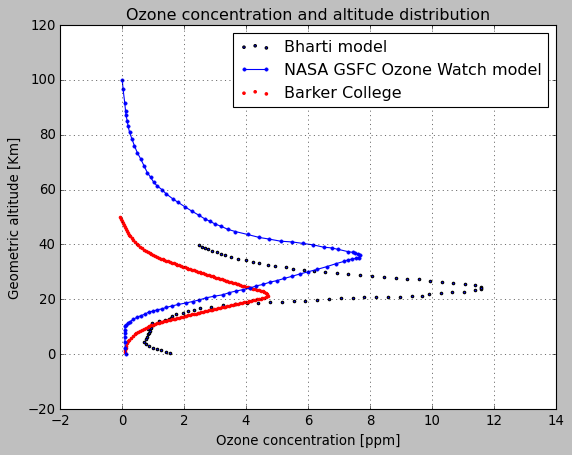

In [518]:
plt.scatter(ozonearray[:, 0], ozonearray[:, 1], marker='.', label = "Bharti model")
plt.plot(ozonearray_2[:, 0], ozonearray_2[:, 1], marker='.', label = "NASA GSFC Ozone Watch model")
plt.scatter(ozonearray_3[:, 0], ozonearray_3[:, 1],color="r", marker='.', label = "Barker College")
plt.title("Ozone concentration and altitude distribution")
plt.grid("both")
plt.xlabel('Ozone concentration [ppm]')
plt.ylabel('Geometric altitude [Km]')
plt.legend()
# Display the plot
plt.show()

## Falling Instantaneous-speed Gauge Analysis (FIGA)


#### Input for FIGA

In [508]:

minimum_cx=0.2
maximum_cx=1

minimum_speed=0
maximum_speed=16


number_of_points=200
air_density1=1.3
air_density2=1.2
air_density3=1.030
probe_mass=1.5  #in Kilograms
parachute_area=1.13 #in square meters


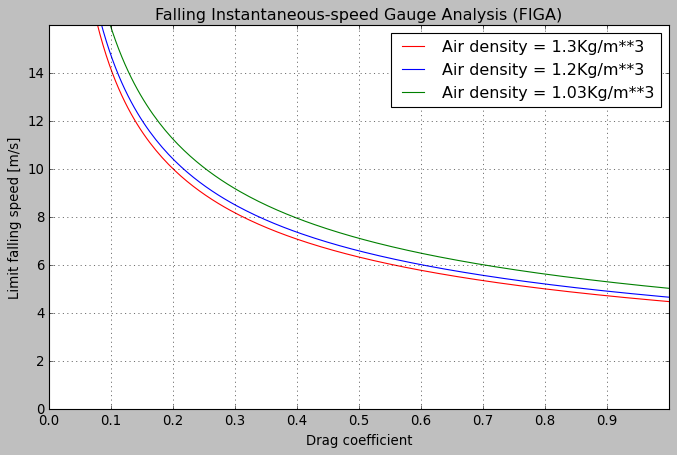

In [492]:
def fall_speed_calc(air_den, c_d):
    falling_speed=math.sqrt((2*probe_mass*9.81)/(c_d*air_den*parachute_area))
    return falling_speed
speedarray=np.linspace(minimum_speed_mps,maximum_cx,number_of_points)
speedarray_list=speedarray.tolist()
c_x_list=[]
c_x_list2=[]
c_x_list3=[]

for item in speedarray_list:
    c_x_list.append(fall_speed_calc(air_density, item))
    
for item in speedarray_list:
    c_x_list2.append(fall_speed_calc(air_density2, item))
    
for item in speedarray_list:
    c_x_list3.append(fall_speed_calc(air_density3, item))
    
air_density1_str=str(air_density1)
air_density2_str=str(air_density2)
air_density3_str=str(air_density3)

label1="Air density = " + air_density1_str+"Kg/m**3"
label2="Air density = " + air_density2_str+"Kg/m**3"
label3="Air density = " + air_density3_str+"Kg/m**3"

plt.plot(speedarray_list, c_x_list, "r-", label=label1)
plt.plot(speedarray_list, c_x_list2, "b-", label=label2)
plt.plot(speedarray_list, c_x_list3, "g-", label=label3)
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Falling Instantaneous-speed Gauge Analysis (FIGA)")
plt.ylim(0, maximum_speed)     # set the ylim to bottom, top
plt.xticks(np.arange(0, maximum_cx, step=0.1))
plt.yticks(np.arange(minimum_speed, maximum_speed, step=2))
plt.xlabel('Drag coefficient')
plt.ylabel('Limit falling speed [m/s]')
plt.grid()
plt.legend()
plt.show()